
# Assignment 2

## Question 1: Linear Regression — Predicting House Prices



In [50]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv("train.csv")
X = df[['OverallQual']].values
y = df['SalePrice'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [51]:



def linear_regression_fit(X, y):
    x_mean = X.mean()
    y_mean = y.mean()
    numerator = ((X - x_mean) * (y - y_mean).reshape(-1, 1)).sum()
    denominator = ((X - x_mean) ** 2).sum()
    slope = numerator / denominator
    intercept = y_mean - slope * x_mean
    return slope, intercept

slope, intercept = linear_regression_fit(X_train, y_train)
print(f"Slope: {slope}, Intercept: {intercept}")


Slope: 44379.87767098291, Intercept: -90233.22290028064


In [52]:


from sklearn.metrics import mean_squared_error

y_pred_custom = slope * X_test + intercept
mse_custom = mean_squared_error(y_test, y_pred_custom)
print("Custom Linear Regression MSE:", mse_custom)


Custom Linear Regression MSE: 2681026163.5090904


In [53]:


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print("Sklearn Linear Regression MSE:", mse_sklearn)


Sklearn Linear Regression MSE: 2681026163.509091


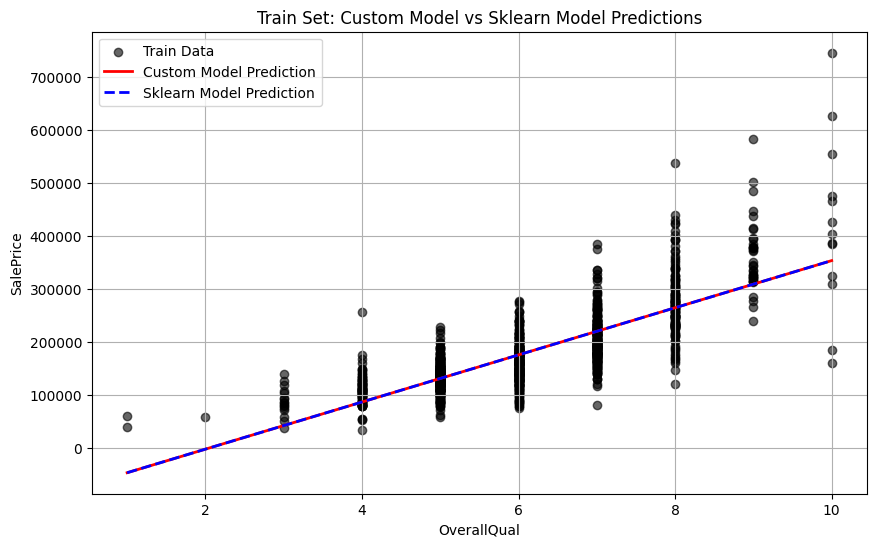

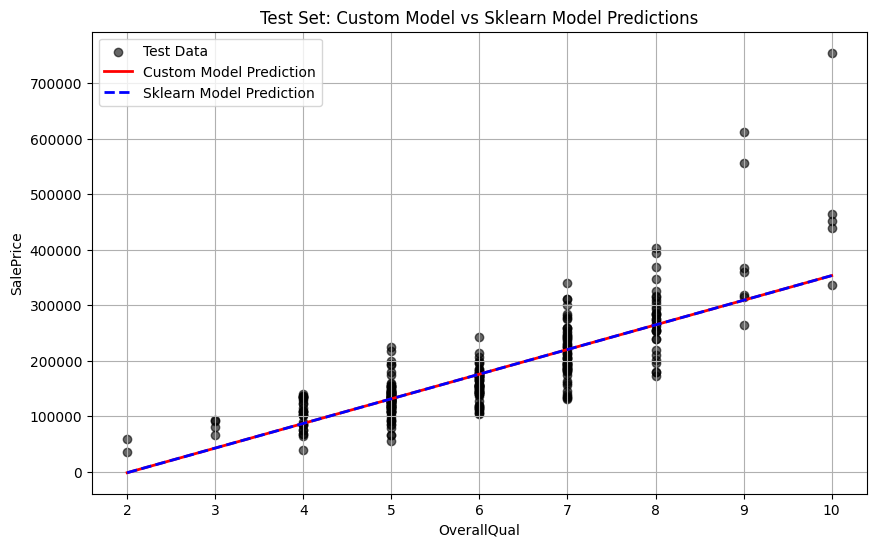

In [54]:
import numpy as np
import matplotlib.pyplot as plt

X_train_flat = X_train.flatten()
X_test_flat = X_test.flatten()

train_pred_custom = slope * X_train_flat + intercept
test_pred_custom = slope * X_test_flat + intercept

train_pred_sklearn = model.predict(X_train)
test_pred_sklearn = model.predict(X_test)

train_sorted_idx = np.argsort(X_train_flat)
test_sorted_idx = np.argsort(X_test_flat)

plt.figure(figsize=(10,6))
plt.scatter(X_train_flat, y_train, color='black', alpha=0.6, label='Train Data')
plt.plot(X_train_flat[train_sorted_idx], train_pred_custom[train_sorted_idx], color='red', linewidth=2, label='Custom Model Prediction')
plt.plot(X_train_flat[train_sorted_idx], train_pred_sklearn[train_sorted_idx], color='blue', linestyle='--', linewidth=2, label='Sklearn Model Prediction')
plt.title('Train Set: Custom Model vs Sklearn Model Predictions')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(X_test_flat, y_test, color='black', alpha=0.6, label='Test Data')
plt.plot(X_test_flat[test_sorted_idx], test_pred_custom[test_sorted_idx], color='red', linewidth=2, label='Custom Model Prediction')
plt.plot(X_test_flat[test_sorted_idx], test_pred_sklearn[test_sorted_idx], color='blue', linestyle='--', linewidth=2, label='Sklearn Model Prediction')
plt.title('Test Set: Custom Model vs Sklearn Model Predictions')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.grid(True)
plt.show()





## Question 2: Logistic Regression — Predicting Student Pass/Fail Outcome



In [55]:


df = pd.read_csv("StudentsPerformance.csv")


df['PassedMath'] = (df['math score'] >= 50).astype(int)
X = df[['reading score']].values
y = df['PassedMath'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,PassedMath
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,1
996,male,group C,high school,free/reduced,none,62,55,55,1
997,female,group C,high school,free/reduced,completed,59,71,65,1
998,female,group D,some college,standard,completed,68,78,77,1


In [56]:



def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def train_logistic_regression(X, y, lr=0.01, iterations=1000):
    m = X.shape[0]
    X_b = np.hstack([np.ones((m, 1)), X])  
    theta = np.zeros((2, 1))
    y = y.reshape(-1, 1)
    
    for _ in range(iterations):
        z = np.dot(X_b, theta)
        h = sigmoid(z)
        gradient = np.dot(X_b.T, (h - y)) / m
        theta -= lr * gradient
    return theta

theta = train_logistic_regression(X_train, y_train)
print(f"Trained weights: {theta.ravel()}")


Trained weights: [-0.3256977   0.04579514]


Custom Logistic Regression Accuracy: 0.83
Confusion Matrix:
 [[  0  34]
 [  0 166]]


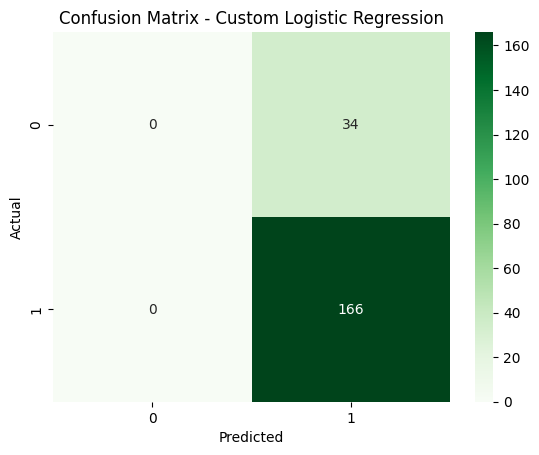

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
def predict(X, theta):
    X_b = np.hstack([np.ones((X.shape[0], 1)), X])
    probs = sigmoid(np.dot(X_b, theta))
    return (probs >= 0.5).astype(int)

y_pred_custom = predict(X_test, theta)

# Accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_custom = accuracy_score(y_test, y_pred_custom)
cm_custom = confusion_matrix(y_test, y_pred_custom)
print("Custom Logistic Regression Accuracy:", accuracy_custom)
print("Confusion Matrix:\n", cm_custom)

sns.heatmap(cm_custom, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Custom Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Sklearn Logistic Regression Accuracy: 0.865
Confusion Matrix:
 [[ 14  20]
 [  7 159]]


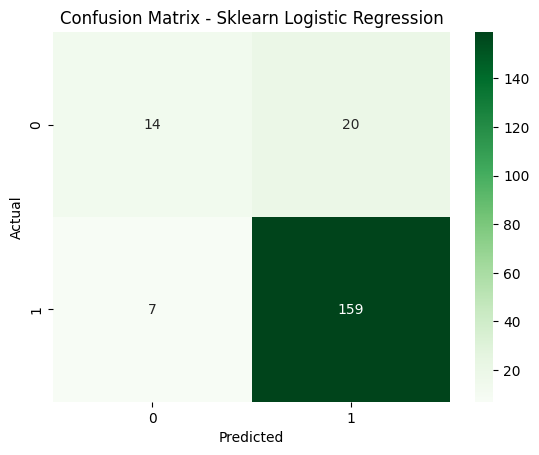

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


clf = LogisticRegression()
clf.fit(X_train, y_train)


y_pred_sklearn = clf.predict(X_test)


accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Sklearn Logistic Regression Accuracy:", accuracy_sklearn)


cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
print("Confusion Matrix:\n", cm_sklearn)


sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Sklearn Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [61]:


from sklearn.metrics import precision_score, recall_score, f1_score

print("Custom Model Metrics:")
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1 Score:", f1_score(y_test, y_pred_custom))


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_sklearn = logreg.predict(X_test)

print("\nSklearn Model Metrics:")
print("Precision:", precision_score(y_test, y_pred_sklearn))
print("Recall:", recall_score(y_test, y_pred_sklearn))
print("F1 Score:", f1_score(y_test, y_pred_sklearn))


Custom Model Metrics:
Precision: 0.83
Recall: 1.0
F1 Score: 0.907103825136612

Sklearn Model Metrics:
Precision: 0.888268156424581
Recall: 0.9578313253012049
F1 Score: 0.9217391304347826
